In [1]:
try:
    from IPython import get_ipython
    get_ipython().magic('reset -f')  
except:
    pass
from IPython import get_ipython
ipython = get_ipython().magic
import io
import os
import sys
os.chdir('/Users/markprosser/Desktop/PythonScripts')
import MCP_functions as MCP
import numpy as np
import matplotlib.pyplot as plt
import pickle
plt.close("all")

import pandas as pd
import savReaderWriter as spss
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
import pylab
import seaborn as sns

/Users/markprosser/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
savFileName = '/Users/markprosser/Desktop/PythonScripts/Input_needed_by/Stats_msc_year2/Stats_9.sav'
with spss.SavReader(savFileName) as reader:
    records = reader.all()
df1 = pd.DataFrame(records)

In [3]:
df1.tail()

,0,1,2,3,4,5,6,7
44,45.0,b'June 2012',18.2,9.3,13.75,NaN,NaN,NaN
45,46.0,b'July 2012',20.4,11.2,15.80,NaN,NaN,NaN
46,47.0,b'August 2012',22.9,12.1,17.50,NaN,NaN,NaN
47,48.0,b'November 2012',12.4,5.9,9.15,NaN,NaN,NaN
48,49.0,b'December 2012',7.8,3.0,5.40,NaN,NaN,NaN


In [4]:
df1.columns = ['id', 'date', 'max_temp', 'min_temp', 'mean_temp', 'nelson_kwh', 'norfolk_kwh', 'victory_kwh']
df1.head()

,id,date,max_temp,min_temp,mean_temp,nelson_kwh,norfolk_kwh,victory_kwh
0,1.0,b'August 2008',21.7,12.8,17.25,2565.0,1832.0,861.0
1,2.0,b'September 2008',18.4,9.1,13.75,2574.0,3653.0,1160.0
2,3.0,b'October 2008',14.2,5.4,9.80,2747.0,4176.0,1834.0
3,4.0,b'November 2008',10.1,5.1,7.60,4873.0,4477.0,1787.0
4,5.0,b'December 2008',6.2,1.1,3.65,4163.0,3262.0,2024.0


In [5]:
#9_1

In [6]:
stats.pearsonr(df1['norfolk_kwh'], df1['nelson_kwh'])

(nan, 1.0)

In [7]:
df2 = pd.DataFrame.copy(df1)
df2 = df2.dropna(subset=['norfolk_kwh'])
df2.tail()

,id,date,max_temp,min_temp,mean_temp,nelson_kwh,norfolk_kwh,victory_kwh
32,33.0,b'April 2011',17.5,5.4,11.45,2562.0,6096.0,2292.0
33,34.0,b'May 2011',18.7,6.7,12.70,3861.0,5699.0,2072.0
34,35.0,b'June 2011',20.0,9.6,14.80,2312.0,4417.0,1934.0
35,36.0,b'July 2011',19.4,10.3,14.85,2533.0,3174.0,1572.0
36,37.0,b'August 2011',20.7,10.9,15.80,2599.0,2506.0,1749.0


In [8]:
#pearson

In [9]:
stats.pearsonr(df2['norfolk_kwh'], df2['nelson_kwh'])

(0.73114278216914486, 2.7577240780027004e-07)

In [10]:
stats.pearsonr(df2['norfolk_kwh'], df2['victory_kwh'])

(0.85230563573053197, 2.1914402815580855e-11)

In [11]:
stats.pearsonr(df2['victory_kwh'], df2['nelson_kwh'])

(0.83958385507429067, 8.3634394264276493e-11)

In [12]:
#spearman

In [13]:
stats.spearmanr(df2['norfolk_kwh'], df2['nelson_kwh'])

SpearmanrResult(correlation=0.73352299668089138, pvalue=2.4106056018102675e-07)

In [14]:
stats.spearmanr(df2['norfolk_kwh'], df2['victory_kwh'])

SpearmanrResult(correlation=0.87760061798406419, pvalue=1.0098614642669246e-12)

In [15]:
stats.spearmanr(df2['victory_kwh'], df2['nelson_kwh'])

SpearmanrResult(correlation=0.83231580965366936, pvalue=1.7083124407644368e-10)

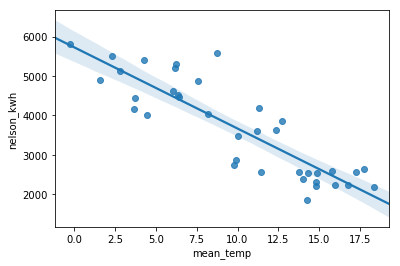

In [16]:
sns.regplot(x=df2["mean_temp"], y=df2["nelson_kwh"], fit_reg=True)
plt.show()

In [17]:
#9_3

In [18]:
nelson_mean = stats.linregress(df2["mean_temp"], df2["nelson_kwh"])
print(nelson_mean)
#pvalue is for slope

LinregressResult(slope=-205.93529548839368, intercept=5728.0265399266145, rvalue=-0.87303989831721518, pvalue=1.8447101812283257e-12, stderr=19.44329289675802)


In [19]:
nelson_r2 = nelson_mean[2]**2
print(nelson_r2)

0.762198664054


In [20]:
nelson_max = stats.linregress(df2["max_temp"], df2["nelson_kwh"])
print(nelson_max)

LinregressResult(slope=-174.56585682248101, intercept=6159.8363799875942, rvalue=-0.87233498811083643, pvalue=2.020575852628422e-12, stderr=16.537494470413574)


In [21]:
nelson_min = stats.linregress(df2["min_temp"], df2["nelson_kwh"])
print(nelson_min)

LinregressResult(slope=-235.53883849890377, intercept=5018.2857327085931, rvalue=-0.84662266859266533, pvalue=4.0459999076245232e-11, stderr=25.026970641936014)


In [45]:
nelson_mean_reg = df2['mean_temp']*nelson_mean[0]+nelson_mean[1]
abc5 = df2["nelson_kwh"] - nelson_mean_reg
#print(abc5)
nelson_mean

LinregressResult(slope=-205.93529548839368, intercept=5728.0265399266145, rvalue=-0.87303989831721518, pvalue=1.8447101812283257e-12, stderr=19.44329289675802)

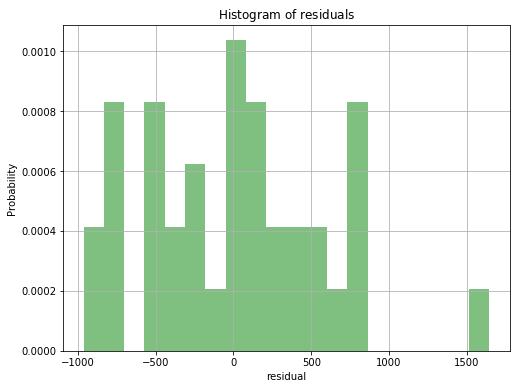

In [23]:
#x = df1['age'].dropna().tolist()
plt.figure(1, figsize=(8, 6));
n, bins, patches = plt.hist(abc5, 20, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('residual')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ residuals}$')
plt.grid(True)
plt.show()

In [24]:
#9_5

In [25]:
stats.pearsonr(df2['mean_temp'], abc5)
#looks like very uncorrelated

(-3.6982842087110145e-17, 1.0)

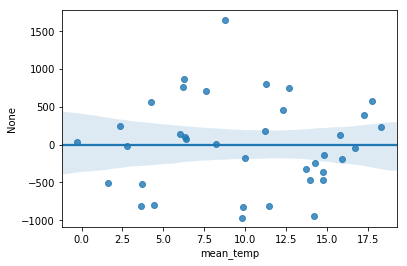

In [26]:
sns.regplot(x=df2["mean_temp"], y=abc5, fit_reg=True)
plt.show()

In [27]:
#9_6

In [28]:
df3 = pd.DataFrame.copy(df1)

In [29]:
df3[37:49]
df3[37:49]['nelson_kwh'] = (df3[37:49]['mean_temp'] * nelson_mean[0]) + nelson_mean[1]
df3[37:49]

/Users/markprosser/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,id,date,max_temp,min_temp,mean_temp,nelson_kwh,norfolk_kwh,victory_kwh
37,38.0,b'September 2011',20.8,10.3,15.55,2525.732695,NaN,NaN
38,39.0,b'October 2011',16.9,7.5,12.20,3215.615935,NaN,NaN
39,40.0,b'January 2012',8.0,1.9,4.95,4708.646827,NaN,NaN
40,41.0,b'February 2012',7.1,1.0,4.05,4893.988593,NaN,NaN
41,42.0,b'March 2012',12.7,2.0,7.35,4214.402118,NaN,NaN
42,43.0,b'April 2012',11.6,3.0,7.30,4224.698883,NaN,NaN
43,44.0,b'May 2012',15.7,7.5,11.60,3339.177112,NaN,NaN
44,45.0,b'June 2012',18.2,9.3,13.75,2896.416227,NaN,NaN
45,46.0,b'July 2012',20.4,11.2,15.80,2474.248871,NaN,NaN
46,47.0,b'August 2012',22.9,12.1,17.50,2124.158869,NaN,NaN


In [30]:
#9_7

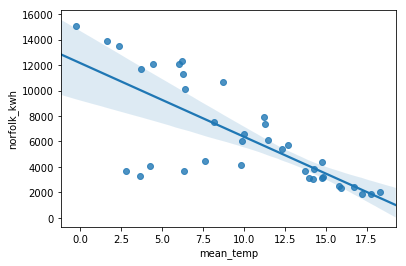

In [31]:
sns.regplot(x=df2["mean_temp"], y=df2["norfolk_kwh"], fit_reg=True)
plt.show()

In [32]:
#9_8

In [33]:
norfolk_mean = stats.linregress(df2["mean_temp"], df2["norfolk_kwh"])
print(norfolk_mean)

LinregressResult(slope=-578.25762299333826, intercept=12156.295414580743, rvalue=-0.74603437732544686, pvalue=1.160410578196582e-07, stderr=87.245365441852599)


In [34]:
norfolk_r2 = norfolk_mean[2]**2
print(norfolk_r2)

0.556567292151


In [35]:
#http://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/
model = sm.OLS(df3["norfolk_kwh"][0:37], sm.add_constant(df3["mean_temp"][0:37]))
fitted = model.fit()


# fig, ax = plt.subplots(figsize=(12,8))
# fig = sm.graphics.influence_plot(lm, alpha  = 0.05, ax = ax, criterion="cooks")
# plt.show()



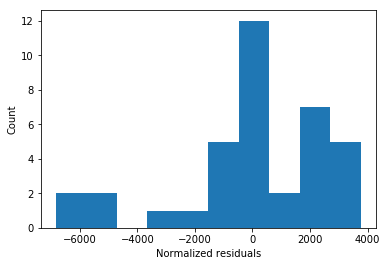

In [36]:
#http://mpastell.com/2013/04/19/python_regression/
plt.hist(fitted.resid)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')
plt.show()

In [37]:
influence = fitted.get_influence()
#c is the distance and p is p-value
c, p = influence.cooks_distance
c

array([  8.08550287e-04,   9.45990267e-04,   1.04472877e-02,
         2.59670035e-02,   2.49350537e-01,   3.03573404e-01,
         1.49044977e-01,   7.00370741e-02,   3.31864257e-04,
         3.29984093e-04,   2.51655783e-03,   7.82899953e-07,
         4.46127071e-09,   8.44810674e-04,   6.29952603e-03,
         2.60387120e-02,   1.50947252e-02,   5.96073463e-02,
         5.22819329e-02,   8.64874638e-03,   1.46143741e-05,
         6.76411946e-05,   1.38975911e-05,   2.02155550e-03,
         1.79426502e-03,   3.01391552e-03,   1.02175116e-02,
         3.77455096e-02,   9.36969516e-02,   2.81023785e-02,
         4.39874814e-02,   2.34149132e-02,   6.66180116e-04,
         1.99592706e-03,   2.59688208e-03,   6.11296329e-04,
         1.27275090e-03])

In [38]:
df4 = pd.DataFrame.copy(df1)
for i in range(36, -1, -1):
    if c[i] > 0.1:
        #print(i)
        df4 = df4.drop(df4.index[i])

In [39]:
df4.head()

,id,date,max_temp,min_temp,mean_temp,nelson_kwh,norfolk_kwh,victory_kwh
0,1.0,b'August 2008',21.7,12.8,17.25,2565.0,1832.0,861.0
1,2.0,b'September 2008',18.4,9.1,13.75,2574.0,3653.0,1160.0
2,3.0,b'October 2008',14.2,5.4,9.80,2747.0,4176.0,1834.0
3,4.0,b'November 2008',10.1,5.1,7.60,4873.0,4477.0,1787.0
7,8.0,b'March 2009',11.1,1.6,6.35,4525.0,3675.0,3225.0


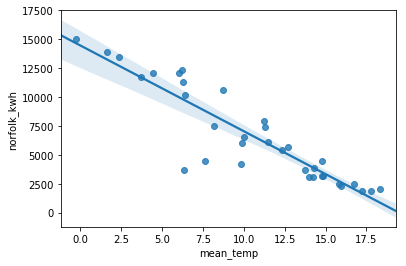

In [40]:
sns.regplot(x=df4["mean_temp"][0:37], y=df4["norfolk_kwh"][0:37], fit_reg=True)
plt.show()

In [41]:
norfolk_mean2 = stats.linregress(df4["mean_temp"][0:34], df4["norfolk_kwh"][0:34])
print(norfolk_mean2)


LinregressResult(slope=-741.7615970309547, intercept=14447.362507478272, rvalue=-0.90582653279709324, pvalue=1.7797759316011384e-13, stderr=61.326797005689976)


In [42]:
#9_11

In [43]:
df5 = pd.DataFrame.copy(df1)
df5 = df5.drop(df5.index[2:8])
df5.head()

,id,date,max_temp,min_temp,mean_temp,nelson_kwh,norfolk_kwh,victory_kwh
0,1.0,b'August 2008',21.7,12.8,17.25,2565.0,1832.0,861.0
1,2.0,b'September 2008',18.4,9.1,13.75,2574.0,3653.0,1160.0
8,9.0,b'April 2009',15.5,4.3,9.90,2865.0,6019.0,1941.0
9,10.0,b'May 2009',17.4,7.3,12.35,3635.0,5386.0,2297.0
10,11.0,b'June 2009',19.2,9.3,14.25,1851.0,3061.0,841.0


In [44]:
norfolk_mean3 = stats.linregress(df5["mean_temp"][0:31], df5["norfolk_kwh"][0:31])
print(norfolk_mean3)

LinregressResult(slope=-796.97320489637889, intercept=15476.52962197633, rvalue=-0.97464654539502182, pvalue=2.0919424578721085e-20, stderr=33.975106767757708)
